<a href="https://colab.research.google.com/github/salsaady/SYSC4415/blob/main/Assignment2/SYSC4415_W25_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SYSC4415 Assignment 2 – Fire Hydrant Detection 🚒

<a href="https://colab.research.google.com/github/jrgreen7/SYSC4906/blob/master/W2025/Assignments/Assignment2/Ass2_SYSC4415_W25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"""
Special thanks to Nader Ibrahim for assembling the dataset. For more details, please refer to the paper:

Ibrahim N, Dick K, Green JR. Computer Vision Fire Hydrant Obstruction Detection System. In2024 IEEE Canadian Conference on Electrical and Computer Engineering (CCECE) 2024 Aug 6 (pp. 799-805). IEEE.


Questions? Please use the Brightspace Discussion Board.

Deadline: See Brightspace end date.
"""

## Instructions
DO NOT wait until the last minute to complete this assignment as training the models might take longer. Also leverage the free GPU provided by colab to make your training faster.


Follow all steps carefully. Your solutions must be self-contained in this notebook. No other supplementary materials or files will be accepted. As soon as I open your notebook, I will click "Runtime" → "Run all". Ensure your notebook runs without errors and displays results clearly.


You are asked to provide both code and text to address discussion questions. For the text answers, see the markdown cells with the ❓ emoji for questions and enter your answers following the ✅ emoji.

Provide sufficient comments in your code to describe its functionality. Do not remove any necessary libraries as this will cause errors.

Download the dataset from Brightspace and store it in your Google Drive under "My Drive" (not in any subfolder). Check the file location via right-click → File Information → Details → Location.

Submit your notebook as a `.ipynb` file named: `SYSC4415W25_A2_FIRSTNAME_LASTNAME_StudentID.ipynb` on Brightspace. No other submission methods will be accepted.


## Dataset
Provided on Brightspace.

#### Dataset details:
- Training Images: 2,272  
- Validation Images: 563  
- Labels: 0 = No Fire Hydrant, 1 = Fire Hydrant  
- Imbalanced dataset (most images do not contain a hydrant).

#### Dataset Information
The dataset contains two main folders:
- `train/`: Contains the training images and a CSV file with labels.
- `valid/`: Contains the validation images and a CSV file with labels.

Each folder includes:
- Images of fire hydrants and non-fire hydrants.
- A CSV file (`_classes.csv`) mapping each image filename to its label:
  - `0` for no fire hydrant.
  - `1` for fire hydrant.

Ensure the zip file of the dataset (FH_detection_data.zip) to your Google Drive and placed under "My Drive" without any subfolders to keep the paths consistent.



## Steps

### 1) Initial Setup
Import necessary libraries


In [ ]:
# Import all the necessary libraries here

import pandas as pd
import os

Mount Google Drive and unzip the dataset.

In [ ]:
## Code provided by Akash. DO NOT CHANGE THIS CELL

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Unzip the dataset
!unzip /content/drive/MyDrive/FH_detection_data.zip -d /content/


# Dataset path
train_data_path = "/content/train"
valid_data_path = "/content/valid"
train_label = pd.read_csv('/content/train/_classes.csv')
valid_label = pd.read_csv('/content/valid/_classes.csv')

Mounted at /content/drive
Archive:  /content/drive/MyDrive/FH_detection_data.zip
   creating: /content/train/
 extracting: /content/train/10063782964_891eedde4e_z_jpg.rf.4caba9d0e35546b469aa896df780d833.jpg  
 extracting: /content/train/100_PNG.rf.d52fbff94c483761d0644a1e8abe4c95.jpg  
 extracting: /content/train/101_PNG.rf.f1335e18f815c8c8044a94c09db7f025.jpg  
 extracting: /content/train/102378468_d8132a415b_z_jpg.rf.6bc008d0d532d3365f580b7aaa7623e3.jpg  
 extracting: /content/train/102_PNG.rf.160c945e0881c92a078a14069d9a6b9a.jpg  
 extracting: /content/train/102_jpg.rf.17df75e9dda0f851c9f5e1d554f07488.jpg  
 extracting: /content/train/103357395_388d701e12_z_jpg.rf.a54c985e93402af49ba422f005e702d8.jpg  
 extracting: /content/train/103_jpg.rf.a649213f3998906bf2298607f82ee839.jpg  
 extracting: /content/train/104351403_25e959f878_z_jpg.rf.43156bd0a74313df69967d88e5e6a268.jpg  
 extracting: /content/train/104_PNG.rf.c14671a6a52ae05f9ae2bf1df7e4316e.jpg  
 extracting: /content/train/104_

----

### 2) Data Exploration
1. Load dataset into a pandas DataFrame.
2. Display display three sample images from each class
3. Create separately class distribution plots of the train and validation data
[Requires 6 sample images (three from each class) and two plots of class distribution (train and validation)]

❓ Why is it important to check for class imbalance before training? How might this affect our model?  
✅ It is important to check for class imbalance before training to avoid bias. If there is class imbalance in a dataset, that means there might not be enough minority class examples to properly train the model. In this case, the model will exclusively train on the majority class. This would affect our model because the model would result in poor performance on the minority class. For example, if 90% of the images were no hydrant, and 10% are hydrants, the model would not perform well when checking for hydrants.




Three sample images from class 0: 



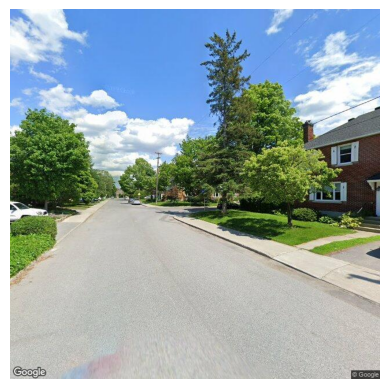

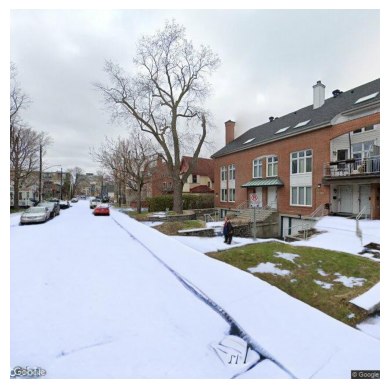

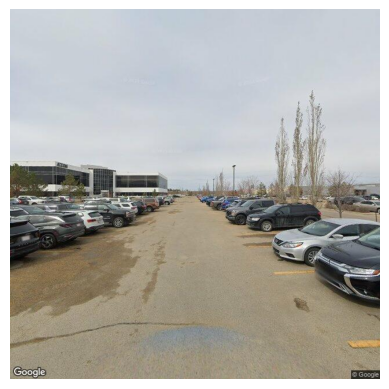


Three sample images from class 1: 



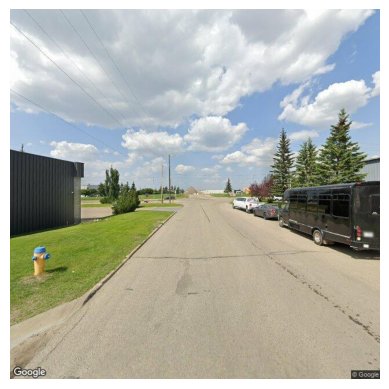

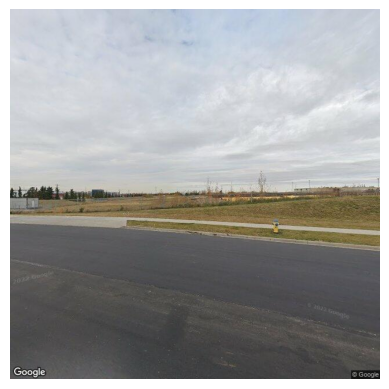

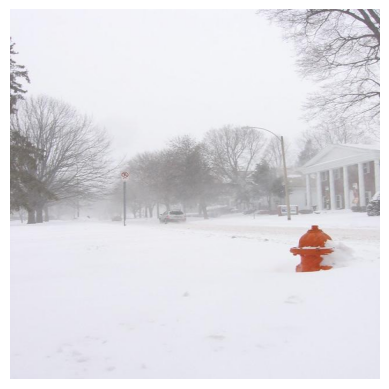


Distribution plot for training data:



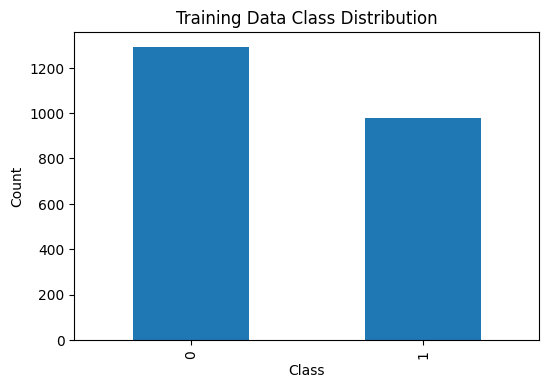


Distribution plot for validation data:



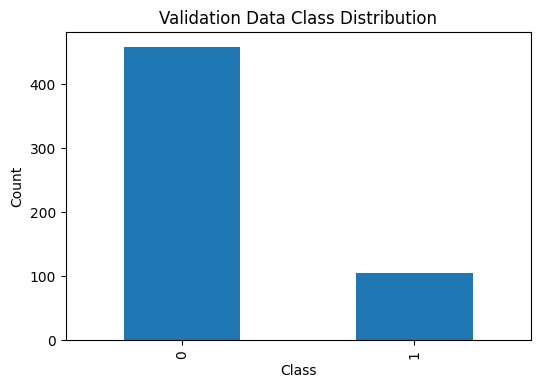

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load dataset into pandas DataFrame
train_df = pd.DataFrame(train_label, columns=["filename", "Fire Hydrants"])
valid_df = pd.DataFrame(valid_label, columns=["filename", "Fire Hydrants"])

# Display three sample images from each class
# classes: 0, 1
file_name = train_df['filename'][0]
file_path = os.path.join(train_data_path, file_name)

class0_samples = train_df[train_df["Fire Hydrants"] == 0].sample(3)
class1_samples = train_df[train_df["Fire Hydrants"] == 1].sample(3)

def display_images(class_samples):
  for i, row in class_samples.iterrows():
    file_name = row['filename']
    file_path = os.path.join(train_data_path, file_name)
    img = Image.open(file_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

print("\nThree sample images from class 0: \n")
display_images(class0_samples)

print("\nThree sample images from class 1: \n")
display_images(class1_samples)

# Create class distribution plots of the train and validation data

print("\nDistribution plot for training data:\n")

# Training data
plt.figure(figsize=(6,4))
train_counts = train_df["Fire Hydrants"].value_counts()
train_counts.plot(kind='bar')
plt.title("Training Data Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

print("\nDistribution plot for validation data:\n")

# Validation data
plt.figure(figsize=(6,4))
valid_counts = valid_df["Fire Hydrants"].value_counts()
valid_counts.plot(kind='bar')
plt.title("Validation Data Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


---

### 3) Preprocessing
- Resize images to 128x128.
- Apply any other necessary transformations that you feel can help.

❓ Would one-hot encoding be necessary for binary classification? Why or why not?  
✅ No, one-hot encoding is not necessary for binary classification because the labels are already binary: 0 and 1. There are already only two classes, so no need to encode more.

torch.Size([3, 128, 128])


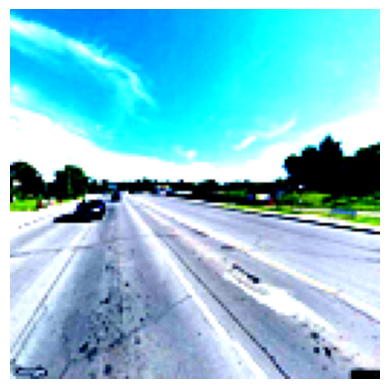

In [ ]:
import torchvision.transforms as transforms

# Define preprocess function that will be used later for on the fly processing
def preprocess_image(image_path):
    size = (128, 128)
    image = Image.open(image_path)
    image = image.convert("RGB")
    image = image.resize(size)

    # Helpful transformations for part 6
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image_tensor = transform(image)
    return image_tensor

# Example usage:
filename = os.listdir(train_data_path)[0].strip()
image_path = os.path.join(train_data_path, filename)
image_tensor = preprocess_image(image_path)
print(image_tensor.shape)

plt.imshow(image_tensor.permute(1, 2, 0))
plt.axis('off')
plt.show()

---

### 4) Creating the Baseline Model
Create a CNN with:
- Two convolutional layers to extract features from the images.
- Max pooling layers after each convolution to reduce spatial dimensions.
- Fully connected layers to perform classification.
- A sigmoid activation function at the output layer to output a probability between 0 and 1.

Required architecture:
- Input: RGB images resized to 128x128 pixels.
- Conv2d (3 input channels, 32 output channels, kernel size 3, padding 1)
- MaxPool2d (kernel size 2, stride 2, padding 0) – applied after the first Conv2d.
- Conv2d (32 input channels, 64 output channels, kernel size 3, padding 1)
- MaxPool2d (kernel size 2, stride 2, padding 0) – applied after the second Conv2d.
- Flatten
- Linear layer with 128 units
- Output Linear layer with 1 unit and sigmoid activation



This model will be trained to classify whether an image contains a fire hydrant or not.


❓ List three ways to improve the baseline model (e.g., adding dropout to... , using batch normalization to..., or increasing the number of layers to...,
be sure to come up with your own ideas!). Provide a brief explanation for each.
What is the change? How does it change the model's behaviour? Why do you expect it to be effective?

✅ Three ways to improve the baseline model:

1. Adding dropout to help reduce overfitting. This will randomly choose neurons to have their output set to zero for that training pass, as if hiding them temporarily, so that the rest of the network has to learn to pick up the slack. This would change the model's behaviour because it would force the netowkr to rely on multiple features instead of a few specific neurons. I expect this to be effective because it will lead to better generalization by reducing overfitting.

2. Using batch normalization to help reduce overfitting. This will change the models behaviour by stopping internal covariate shift. It can allow for higher learning rates especially when the network is just initialize. I expect thius to be effective because it can help generalization by reducing overfitting.

3. Increasing the number of convulational layers to help the model learn more complex and abstract features. This would change the model because it would have a larger depth, and would have to learn more complex hierarchical feature representations. I expect this to be effective because it could help identify more specific features which can improve classification.

4.  Data augmentation to create new training examples by applying random transormations to the existing data like rotations, zoom, flip. This would change the training data samples in the model, which would be effective because it will help diversify the training set which would help reduce overfitting.

In [ ]:
import torch
import torch.nn as nn

# Baseline Model

class BaselineModel(nn.Module):
    def __init__(self):
        super(BaselineModel, self).__init__()

        # Convolutional and pooling layers
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        )
        # Flatten
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 32 * 32, 128),
            nn.ReLU()
        )
        # Output
        self.output = nn.Sequential(
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.fc(x)
        x = self.output(x)
        return x

model = BaselineModel()
print(model)

BaselineModel(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=65536, out_features=128, bias=True)
    (2): ReLU()
  )
  (output): Sequential(
    (0): Linear(in_features=128, out_features=1, bias=True)
    (1): Sigmoid()
  )
)


---

### 5) Training and Evaluation
Train your CNN using Binary Cross Entropy Loss and an Adam optimizer. Use a learning rate of 0.001. Iterate over your dataset for 10 epochs and track the loss. Train using the train data in /train.

Evaluate your model on the test data in /valid using Precision, Recall, and F1-Score to assess performance.


❓ Which evaluation metric you think is the most suitable in our case, and why?

✅ In our case, I think the evaluation metric most suitable is the F1-Score, since it combines recall and precision. It can be used to measure how effectively the model can balance the trade off between precision and recall.

If we used precision, it could come at the expense of recall because the model might only predict very obious cases where there is a hydrant, since it focuses on how out of all the positive predictions of hydrants, how many actually have one. This could lead to missing some hydrants since it will only predict one when it's absolutely sure.

If we used recall, it could come at the expense of precision because it focuses on how many hydrants were correctly predicted as true, out of all the images that should be predicted as true, therefore the model might identify images that don't actually have hydrants.   

Therefore, the F1-Score is suitable to balance these issues.

Display the confusion matrix.

❓ Explain the confusion matrix to a non-technical audience and relate it to your chosen metric.  
✅ The confusion matrix is a table that shows how many times the model got things right. There are 4 values in the table, when I trained the model the results I got in the table were 303, 156, 25, and 79. The rows are labelled with the actual values in the data, and columns are the predicted values, so that when you read the matrix you can compare the actual vs predicted values to measure the model's accuracy.

The value in the top left corner shows the true negatives, meaning how many times the model correctly identifies that there is no fire hydrant.

The value in the top right corner is the false positives, meaning how many times the model incorrectly identifies that there's a fire hydrant.

The value in the bottom left corner is the false negatives, meaning how many times the model classifies no fire hydrant when there in fact is one.

The bottom right is the ture positives, meaning the times the model correctly identifies a fire hydrant.

Based on the confusion and matrix and relating it to the F1-Score, it is noticeable that there are a lof of false positives, indicating a really low precision. We could emphasize precision but that might decrease recall so the best choice is to opt for a balance by using the F1-Score matrix.

In [ ]:
import torch
from torch import nn
from torch import optim
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Function to reuse loading and processing training and validation data
def load_and_process_data(df, data_path):
  images = []
  labels = []
  for idx, row in df.iterrows():
    filename = row['filename']
    label = row['Fire Hydrants']
    image_path = os.path.join(data_path, filename)
    image_tensor = preprocess_image(image_path) # resize, convert to tensor, normalize
    images.append(image_tensor)
    labels.append(label)
  image_tensor = torch.stack(images)
  labels_tensor = torch.tensor(labels, dtype=torch.float32).unsqueeze(1)
  dataset = TensorDataset(image_tensor, labels_tensor)
  dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
  return dataloader

# Function for training model to reuse in part 6
def train_model(epochs, model, trainloader, loss_fn, optimizer):
  losses = []
  history = {"train_loss": []}
  for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0
    for X, y in trainloader:
      # Forward pass
      y_pred = model(X) #predictions for the batch
      loss = loss_fn(y_pred, y) #BCE loss between predictions and true labels

      # Backward pass
      optimizer.zero_grad() #reset gradients
      loss.backward() #gradient of the loss w.r.t model parameters
      optimizer.step() #updates model params using the gradients

      epoch_loss += loss.item() #loss for each batch
      # Track loss
      losses.append(loss.item()) #loss value added to losses list

    loss_avg = epoch_loss / len(train_dataloader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss_avg:.4f}")

  return history

# Function for testing model
def test_model(model, testloader):
  model.eval()
  y_pred_list = []
  y_true_list = []
  binary_preds = []

  with torch.no_grad():
    for X, y in testloader:
      y_pred = model(X)
      y_pred_list.extend(y_pred.squeeze().tolist())
      y_true_list.extend(y.squeeze().tolist())

  for pred in y_pred_list:
    if pred > 0.5:
      binary_preds.append(1)
    else:
      binary_preds.append(0)

  precision = precision_score(y_true_list, binary_preds)
  recall = recall_score(y_true_list, binary_preds)
  f1 = f1_score(y_true_list, binary_preds)

  print(f"Validation Precision: {precision:.4f}")
  print(f"Validation Recall:    {recall:.4f}")
  print(f"Validation F1-Score:  {f1:.4f}")

  # Display confusion matrix
  matrix = confusion_matrix(y_true_list, binary_preds)
  print("\nConfusion Matrix:")
  print(matrix)

# Train CNN
print("Training CNN on train data...")
num_epochs = 10
model = BaselineModel()

# BCE Loss and Adam optimizer
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Load training data
train_dataloader = load_and_process_data(train_df, train_data_path)

# Iterate over dataset using 10 epochs
train_model(num_epochs, model, train_dataloader, loss_fn, optimizer)

# Evaluate model on test data in /valid using Precision, Recall, and F1-Score to assess performance.
print("\nEvaluating model on test data...")
valid_dataloader = load_and_process_data(valid_df, valid_data_path)
test_model(model, valid_dataloader)


Training CNN on train data...
Epoch 1/10, Loss: 0.7161
Epoch 2/10, Loss: 0.4784
Epoch 3/10, Loss: 0.4039
Epoch 4/10, Loss: 0.3316
Epoch 5/10, Loss: 0.2575
Epoch 6/10, Loss: 0.1980
Epoch 7/10, Loss: 0.1193
Epoch 8/10, Loss: 0.0831
Epoch 9/10, Loss: 0.0525
Epoch 10/10, Loss: 0.0427

Evaluating model on test data...
Validation Precision: 0.4702
Validation Recall:    0.6827
Validation F1-Score:  0.5569

Confusion Matrix:
[[379  80]
 [ 33  71]]


---


### 6) Model Improvements
Apply and evaluate three improvements ideas that you mentioned in the Baseline CNN question (Step 4).
Implement each idea separately, train a model with that improvement, and report the performance of each model using the metrics from Step 5. As above, train using the data in /train and test using the data in /valid.


❓ Which model would you deploy? Why?  
✅ By analyzing evaluation results of the three models, I found that the model with batch normalization improvements has the better performance. All three validation metrics are equally around 50%, and it doesn't have an alarmingly large number of false positives or false negatives, both equally have a count of around 40. When comparing the true positives and true negatives with the distribution graphs made in part 2, these values align with each other.

When comparing the model with batch normalization with the other two improved models, I observed that it has the highest F1-Score (~58.7%), which means it has a better overall balance between recall and precision. The other two models both have a higher recall but lower precision less than 50%.


Therefore, the model that I would deploy is the improved model with batch normalization.

In [ ]:
import torch
from torch import nn
from torch import optim
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Adding dropout
class DropoutModel(nn.Module):
    def __init__(self):
        super(DropoutModel, self).__init__()
        # Convolutional and pooling layers
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
            nn.Dropout(0.5)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
            nn.Dropout(0.5)
        )
        # Flatten
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 32 * 32, 128),
            nn.ReLU(),
            nn.Dropout(0.5)
        )
        # Output
        self.output = nn.Sequential(
            nn.Linear(128, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.fc(x)
        x = self.output(x)
        return x

# Batch normalization
class BatchNormModel(nn.Module):
    def __init__(self):
        super(BatchNormModel, self).__init__()
        # Convolutional and pooling layers
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        )
        # Flatten
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 32 * 32, 128),
            nn.ReLU()
        )
        # Output
        self.output = nn.Sequential(
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.fc(x)
        x = self.output(x)
        return x

# Increase convulation layers
class ConvLayerModel(nn.Module):
    def __init__(self):
        super(ConvLayerModel, self).__init__()
        # Convolutional and pooling layers
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        )
        # Flatten
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 16 * 16, 128),
            nn.ReLU()
        )
        # Output
        self.output = nn.Sequential(
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.fc(x)
        x = self.output(x)
        return x


#train a model with that improvement, and report the performance of each model using the metrics from Step 5

# Train CNN with added dropout
print("Training model with added dropout...")
num_epochs = 10
model_dropout = DropoutModel()

# BCE Loss and Adam optimizer
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model_dropout.parameters(), lr=0.001)

# Load training data
train_dataloader = load_and_process_data(train_df, train_data_path)

# Iterate over dataset using 10 epochs
train_model(num_epochs, model_dropout, train_dataloader, loss_fn, optimizer)

# Evaluate model on test data in /valid using Precision, Recall, and F1-Score to assess performance.
print("\nEvaluating model on test data...")
valid_dataloader = load_and_process_data(valid_df, valid_data_path)
test_model(model_dropout, valid_dataloader)


# Train CNN with batch normalization
print("\nTraining model with batch normalization...")
num_epochs = 10
model_batch = BatchNormModel()

# BCE Loss and Adam optimizer
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model_batch.parameters(), lr=0.001)

# Load training data
train_dataloader = load_and_process_data(train_df, train_data_path)

# Iterate over dataset using 10 epochs
train_model(num_epochs, model_batch, train_dataloader, loss_fn, optimizer)

# Evaluate model on test data in /valid using Precision, Recall, and F1-Score to assess performance.
print("\nEvaluating model on test data...")
valid_dataloader = load_and_process_data(valid_df, valid_data_path)
test_model(model_batch, valid_dataloader)


# Train CNN with increased convulation layers
print("\nTraining model with added convulation layers...")
num_epochs = 10
model_conv = ConvLayerModel()

# BCE Loss and Adam optimizer
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model_conv.parameters(), lr=0.001)

# Load training data
train_dataloader = load_and_process_data(train_df, train_data_path)

# Iterate over dataset using 10 epochs
train_model(num_epochs, model_conv, train_dataloader, loss_fn, optimizer)

# Evaluate model on test data in /valid using Precision, Recall, and F1-Score to assess performance.
print("\nEvaluating model on test data...")
valid_dataloader = load_and_process_data(valid_df, valid_data_path)
test_model(model_conv, valid_dataloader)



Training model with added convulation layers...
Epoch 1/10, Loss: 0.6040
Epoch 2/10, Loss: 0.5141
Epoch 3/10, Loss: 0.4890
Epoch 4/10, Loss: 0.4452
Epoch 5/10, Loss: 0.4070
Epoch 6/10, Loss: 0.3686
Epoch 7/10, Loss: 0.3147
Epoch 8/10, Loss: 0.2598
Epoch 9/10, Loss: 0.1929
Epoch 10/10, Loss: 0.1253

Evaluating model on test data...
Validation Precision: 0.3671
Validation Recall:    0.7308
Validation F1-Score:  0.4887

Confusion Matrix:
[[328 131]
 [ 28  76]]


---

### 7) Personal Inference Test
Test your trained model on at least FIVE new images (either collected using a camera or collected from the internet). Predict whether each image contains a fire hydrant and print the result.

Of your five images:
- Include at least one image of a fire hydrant that your model does not detect correctly.
- Include at least one image of a fire hydrant that your model does detect correctly.

❓ Challenge: Can you find an image that does not actually contain a fire hydrant, but your model believes that a hydrant is present?

✅ There are a few images that do not contain a fire hydrant, but my model believes is a fire hydrant. IMG_8369 contains a snow plowing marker, IMG_8383 which has a yellow box near the Carleton entrance, and IMG_8375 which doesn't have any objects.

❓ Explain why you believe your model performed the way it did on each of your five images. What patterns or mistakes do you observe?

✅ Something I observed was that there was no instance where there was a fire hydrant and my model missed it or didn't predict it to be there. However, there were several isntances where there wasn't a fire hydrant and it falsely predicted one. For those instances, I think that where the snow plowing marker was, that vertical rectangular shape could have triggered the model to think it was a hydrant. In IMG_8383 where there was a yellow box, I think the bright yellow colour similar to a fire hydrant triggered the model. For the third image, although it didn't contain anything bright or with similar shape to a fire hydrant, there are lots of shadows, and also different colour contrasts like grass, snow, the sky, and parts of a house. I think that there may have been too much noise in the picture or background patterns that resulted in an incorrect prediction. For the images that it did predict correctly, that meant there was clearly a fire hydrant shape/colour, or there was nothing in the picture that triggered the model.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



Image: IMG_8362.jpg
Model output: 1.0000
Prediction: Fire Hydrant


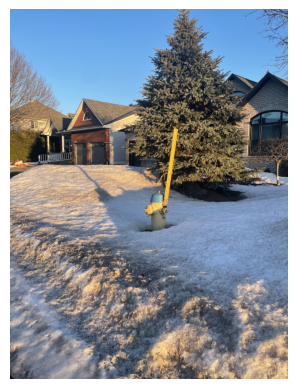


Image: IMG_8369.jpg
Model output: 0.9980
Prediction: Fire Hydrant


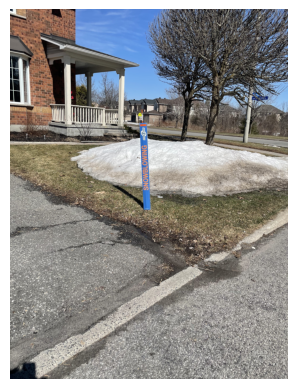


Image: IMG_8375.jpg
Model output: 0.9923
Prediction: Fire Hydrant


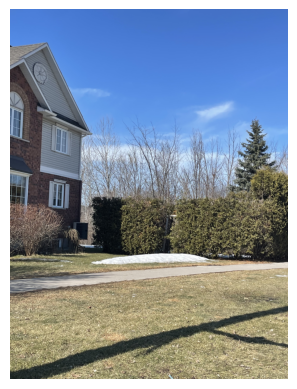


Image: IMG_8361.jpg
Model output: 0.1007
Prediction: No Fire Hydrant


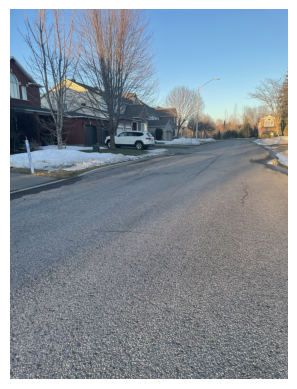


Image: IMG_8383.jpg
Model output: 0.7672
Prediction: Fire Hydrant


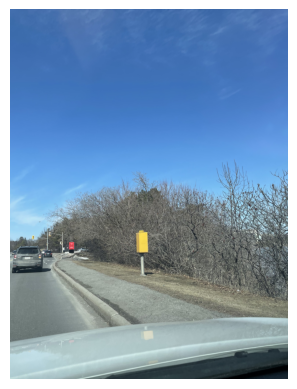


Image: IMG_8363.jpg
Model output: 0.0040
Prediction: No Fire Hydrant


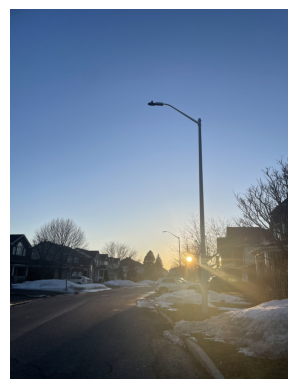


Image: IMG_8373.jpg
Model output: 0.9584
Prediction: Fire Hydrant


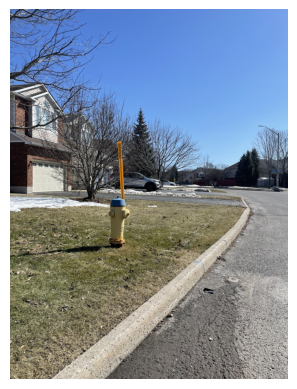

In [ ]:
import os
test_folder = "/content/drive/MyDrive/test_images"
for image in os.listdir(test_folder):
    img_path = os.path.join(test_folder, image)

    # Preprocess the image and add a batch dimension
    img_tensor = preprocess_image(img_path).unsqueeze(0)  # shape: [1, 3, 128, 128]

    # Get model prediction without computing gradients
    with torch.no_grad():
        model_output = model_batch(img_tensor).item()  # Model output probability

    if model_output >= 0.5:
        prediction = 1
    else:
        prediction = 0

    print(f"\nImage: {image}")
    print(f"Model output: {model_output:.4f}")
    print(f"Prediction: {'Fire Hydrant' if prediction == 1 else 'No Fire Hydrant'}")
    # display the image
    image = Image.open(img_path).convert("RGB")
    plt.imshow(image)
    plt.axis("off")
    plt.show()

---

### 8) (Optional) Transfer Learning with Pretrained CNN

#### Description:
In this optional step, fine-tune a pretrained CNN (e.g., ResNet50) on your dataset and compare its performance to your custom CNN.

- Use `torchvision.models.resnet50(pretrained=True)` as a starting model.

Reference: https://pytorch.org/vision/main/models/generated/torchvision.models.resnet50.html
- Modify the final layer to fit your binary classification task (fire hydrant vs. no fire hydrant).
- Resize input images to **256x256** pixels.
- Fine-tune the model and evaluate its performance.
- Compare the results to your custom CNN in terms of accuracy, training time, and other relevant metrics.

#### Libraries to use:
```python
import torchvision.models as models
```

#### Student Code:
```python
# Your code here
```


------

### 9) Final Thoughts
❓ How would you improve the model in the future?

✅ I would improve my model in the future by trying to combine the model improvement techniques that I used before. This way, I could find a better balance for recall and precision, but this would need some finetuning of hyperparameters. I would also incorporate data augmentation, by creating new training examples by applying random transormations to the existing data like rotations, zoom, flip. This would change the training data samples in the model, which would be effective because it will help diversify the training set which would help reduce overfitting.

One more way I would improve my model is by diversifying the training set to included different outdoor settings, like nighttime. This would help identify fire hydrants in different lighting, which would maybe help with false positives wherever there are shadows.

-----

## Final Question:
### ❓ Did you use an AI tool in completing your assignment? If yes, which AI tool(s) did you use? How did you prompt it? How you validate the response?

✅ Yes, I used the built in code autocompleter on Colab. Wherever it suggested an autocompletion, I used it and the way I verified it was by reviewing the line or lines of code and then running the cell to review the output. If the output was what I expected, I used the suggestions. This ensured that my code was clean and consistent and also helped reduce the occurence of bugs.
Another AI Tool that I used was ChatGPT, to help me explain certain errors that I was coming across. The way I would prompt it is by first identifying the error message that I had and then asking ChatGPT what it means and what are examples of instances that would trigger this error. I also went to ChatGPT for help on organizing my outputs, particularly my print statements, and it gave me ideas on what would be helpful to display, like displaying the loss for each epoch in separate lines while training.

Other than AI, lecture, and tutorial materials, I found some other resources online that were helpful for me to grasp concepts, these are a few:

https://developers.google.com/machine-learning/crash-course/overfitting/imbalanced-datasets


---

## Submission
Submit your `.ipynb` notebook on Brightspace using the following name format:  
`SYSC4415W25_A2_FIRSTNAME_LASTNAME_StudentID.ipynb`

